# Introduction

In this notebook we develop a Multi Agent Deep Deterministic Policy Gradient (MADDPG) model with defined Collaboration Level and Energy Expenditure and analyse its performance on Unity's Tennis environment with two agents.

This is part of the third and last project: *Collaboration and Competition* in **Deep Reinforcement Learning for Enterprise** Course at *Udacity*.

## 0 - Importing Packages

Importing all required packages, utilities and initialising the environment.

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from training_maddpg_cl_ee import maddpg
from maddpg_cl_ee import Team

def maxlen(dic):
    l = 0
    for e in dic.values():
        if len(e) > l:
            l = len(e)
    return l

def dic_fix(dic):
    dicF = {}
    ml = maxlen(dic)
    for i , e in enumerate(dic.values()):
        new = [None] * (ml - len(e))
        dicF[i] = e + new
    return dicF

env = UnityEnvironment(file_name='Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 1 - Training a MADDPG model with collaboration level one

In [2]:
dic = {'n_episodes': 5000,         # number episodes used for learning
       'max_t': 1000,               # maximum number of steps per episode 
       'actor_fc1_units': 400,      # number of units for first hidden layer actor net
       'actor_fc2_units': 300,      # number of units for second hidden layer actor net
       'critic_fc1_units': 400,     # number of units for first hidden layer critic net
       'critic_fc2_units': 300,     # number of units for second hidden layer critic net
       'buffer_size': int(1e6),     # replay buffer size
       'batch_size': 512,           # minibatch size
       'gamma': 0.99,               # discount factor
       'tau': 1e-3,                 # for soft update of target parameters
       'lr_actor': 1e-4,            # learning rate of the actor 
       'lr_critic': 1e-4,           # learning rate of the critic
       'weight_decay': 0,           # L2 weight decay
       'update_every': 1,           # learning step frequency per acting step
       'epsilon': 0.9,              # uniform noise process initial scale parameter
       'epsilon_halflife': 300,     # no episodes to achieve half of the noise
       'collaboration_level': 1,    # level at which agents share rewards
       'energy_expenditure': 0.000,  # cost of making a move
       'file': 'chpt_maddpg_cl'}    # file name to save agent's net weights

In [3]:
scores_dic = {}
times_dic = {}

for i in range(1):
    print('\nTraining session:\t' + str(i+1))
    scores, times = maddpg(env, dic, SuccessStop=True, NoiseNet=False, PER=True)
    scores_dic[i] = scores
    times_dic[i] = times
    
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_maddpg_cl_analysis.csv')
times_df.to_csv('times_maddpg_cl_analysis.csv')


Training session:	1
Episode 100	Average Score: 0.01	Time Split: 117.35					 
Episode 200	Average Score: 0.00	Time Split: 155.36					 
Episode 300	Average Score: 0.00	Time Split: 159.89					 
Episode 400	Average Score: 0.00	Time Split: 165.76					 
Episode 500	Average Score: 0.00	Time Split: 160.59					 
Episode 600	Average Score: 0.00	Time Split: 158.79					 
Episode 700	Average Score: 0.01	Time Split: 172.03					 
Episode 800	Average Score: 0.00	Time Split: 166.27					 
Episode 900	Average Score: 0.00	Time Split: 156.83					 
Episode 1000	Average Score: 0.00	Time Split: 158.24					 
Episode 1100	Average Score: 0.00	Time Split: 156.66					 
Episode 1200	Average Score: 0.00	Time Split: 149.78					 
Episode 1300	Average Score: 0.00	Time Split: 154.88					 
Episode 1400	Average Score: 0.00	Time Split: 149.55					 
Episode 1500	Average Score: 0.00	Time Split: 150.94					 
Episode 1600	Average Score: 0.00	Time Split: 150.73					 
Episode 1700	Average Score: 0.00	Time Split: 149.38					 
Ep

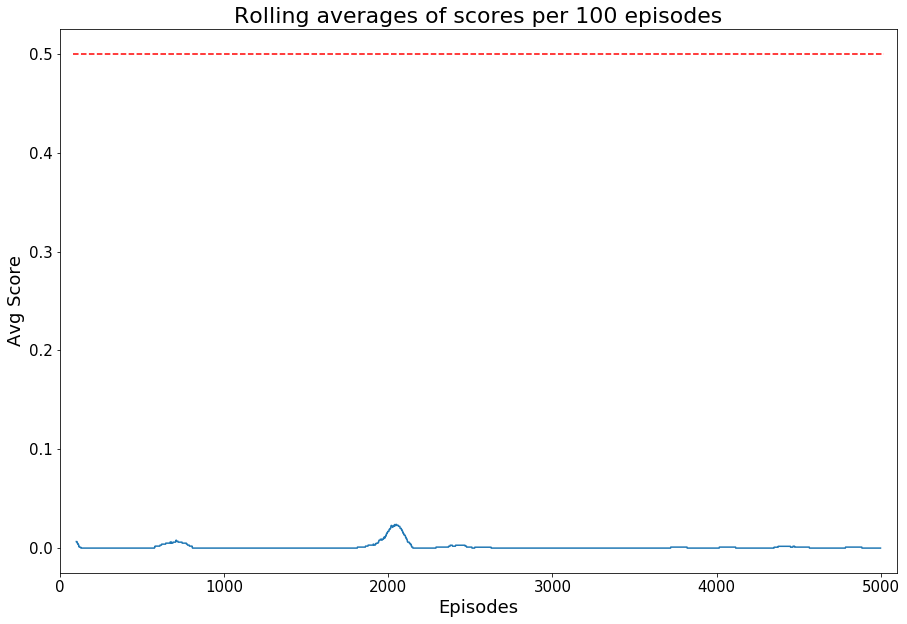

In [3]:
scores_df = pd.read_csv('scores_maddpg_cl_analysis.csv',index_col=0)
times_df = pd.read_csv('times_maddpg_cl_analysis.csv', index_col=0)
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(0,5100), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.hlines(0.5, xmin = 80, xmax=5020, linestyles='dashed', label='goal', colors='r')
ax.figure.savefig("RollAvgMADDPGCL.png")

In [4]:
rolling.describe()

,0
count,4901.000000
mean,0.001110
std,0.003322
min,0.000000
25%,0.000000
50%,0.000000
75%,0.001000
max,0.024000


 The D3PG model with Noisy Nets and PER **solved the environment 70% of the times** when maximum number of episodes per training session is 5000. In successful training sessions, it takes on average **1600 episodes**. The distribution shows a dispersion of **375 episodes** standard deviation.

## 2 - Training a MADDPG model with collaboration level one and energy expenditure 

In [4]:
dic = {'n_episodes': 10000,         # number episodes used for learning
       'max_t': 1000,               # maximum number of steps per episode 
       'actor_fc1_units': 400,      # number of units for first hidden layer actor net
       'actor_fc2_units': 300,      # number of units for second hidden layer actor net
       'critic_fc1_units': 400,     # number of units for first hidden layer critic net
       'critic_fc2_units': 300,     # number of units for second hidden layer critic net
       'buffer_size': int(1e6),     # replay buffer size
       'batch_size': 512,           # minibatch size
       'gamma': 0.99,               # discount factor
       'tau': 1e-3,                 # for soft update of target parameters
       'lr_actor': 1e-4,            # learning rate of the actor 
       'lr_critic': 1e-4,           # learning rate of the critic
       'weight_decay': 0,           # L2 weight decay
       'update_every': 1,           # learning step frequency per acting step
       'epsilon': 0.9,              # uniform noise process initial scale parameter
       'epsilon_halflife': 300,     # no episodes to achieve half of the noise
       'collaboration_level': 1,    # level at which agents share rewards
       'energy_expenditure': 0.0001,  # cost of making a move
       'file': 'chpt_maddpg_cl_ee'}    # file name to save agent's net weights

In [5]:
scores_dic = {}
times_dic = {}

for i in range(1):
    print('\nTraining session:\t' + str(i+1))
    scores, times = maddpg(env, dic, SuccessStop=True, NoiseNet=False, PER=True)
    scores_dic[i] = scores
    times_dic[i] = times
    
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_maddpg_cl_ee_analysis.csv')
times_df.to_csv('times_maddpg_cl_ee_analysis.csv')


Training session:	1
Episode 100	Average Score: 0.02	Time Split: 145.55					 
Episode 200	Average Score: 0.02	Time Split: 195.15					 
Episode 300	Average Score: 0.02	Time Split: 191.32					 
Episode 400	Average Score: 0.02	Time Split: 200.96					 
Episode 500	Average Score: 0.02	Time Split: 198.86					 
Episode 600	Average Score: 0.01	Time Split: 162.65					 
Episode 700	Average Score: 0.03	Time Split: 238.77					 
Episode 800	Average Score: 0.03	Time Split: 221.11					 
Episode 900	Average Score: 0.06	Time Split: 278.75					 
Episode 1000	Average Score: 0.08	Time Split: 376.40					 
Episode 1100	Average Score: 0.08	Time Split: 363.66					 
Episode 1200	Average Score: 0.07	Time Split: 301.94					 
Episode 1300	Average Score: 0.07	Time Split: 305.65					 
Episode 1400	Average Score: 0.08	Time Split: 332.58					 
Episode 1500	Average Score: 0.10	Time Split: 467.41					 
Episode 1600	Average Score: 0.13	Time Split: 543.13					 
Episode 1700	Average Score: 0.18	Time Split: 742.89					 
Ep

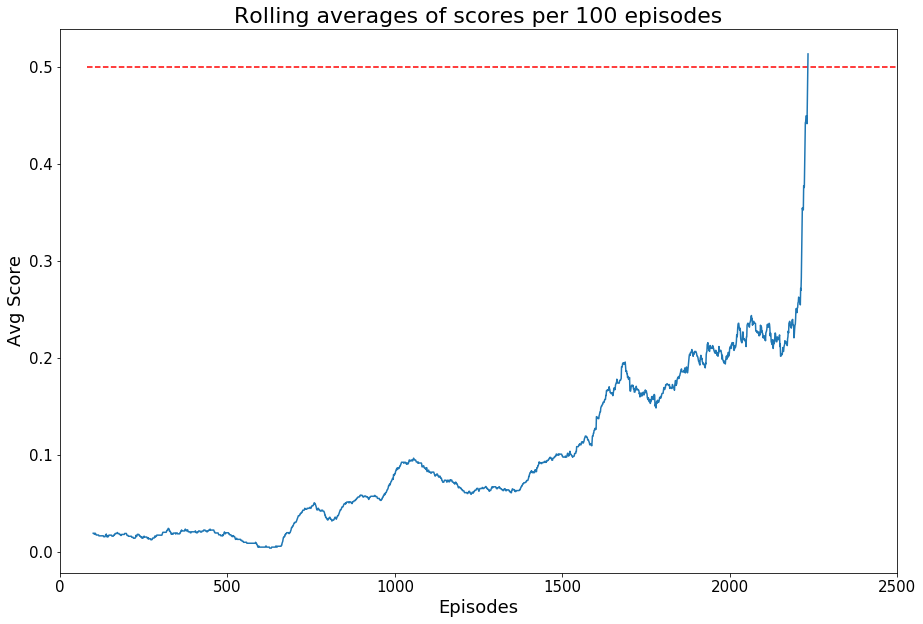

In [7]:
scores_df = pd.read_csv('scores_maddpg_cl_ee_analysis.csv',index_col=0)
times_df = pd.read_csv('times_maddpg_cl_ee_analysis.csv', index_col=0)
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(0,2500), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.hlines(0.5, xmin = 80, xmax=5020, linestyles='dashed', label='goal', colors='r')
ax.figure.savefig("RollAvgMADDPGCLEE.png")

In [8]:
rolling.describe()

,0
count,2136.000000
mean,0.094825
std,0.079371
min,0.004000
25%,0.021675
50%,0.067300
75%,0.164000
max,0.514000


Relative high volatility. Strong support from PER and growth passed 0.25 score mark.

## 3 - Long training session of a MADDPG model with collaboration level one and high energy expenditure 

In [2]:
dic = {'n_episodes': 5000,         # number episodes used for learning
       'max_t': 1000,               # maximum number of steps per episode 
       'actor_fc1_units': 400,      # number of units for first hidden layer actor net
       'actor_fc2_units': 300,      # number of units for second hidden layer actor net
       'critic_fc1_units': 400,     # number of units for first hidden layer critic net
       'critic_fc2_units': 300,     # number of units for second hidden layer critic net
       'buffer_size': int(1e6),     # replay buffer size
       'batch_size': 512,           # minibatch size
       'gamma': 0.99,               # discount factor
       'tau': 1e-3,                 # for soft update of target parameters
       'lr_actor': 1e-4,            # learning rate of the actor 
       'lr_critic': 1e-4,           # learning rate of the critic
       'weight_decay': 0,           # L2 weight decay
       'update_every': 1,           # learning step frequency per acting step
       'epsilon': 0.9,              # uniform noise process initial scale parameter
       'epsilon_halflife': 300,     # no episodes to achieve half of the noise
       'collaboration_level': 1,    # level at which agents share rewards
       'energy_expenditure': 0.001,  # cost of making a move
       'file': 'chpt_maddpg_cl_ee_long'}    # file name to save agent's net weights

In [ ]:
scores_dic = {}
times_dic = {}

for i in range(1):
    print('\nTraining session:\t' + str(i+1))
    scores, times = maddpg(env, dic, SuccessStop=False, NoiseNet=False, PER=True)
    scores_dic[i] = scores
    times_dic[i] = times
    
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_maddpg_cl_ee_long_analysis.csv')
times_df.to_csv('times_maddpg_cl_ee_long_analysis.csv')


Training session:	1
Episode 100	Average Score: 0.03	Time Split: 171.05					 
Episode 200	Average Score: 0.01	Time Split: 180.30					 
Episode 300	Average Score: 0.03	Time Split: 213.45					 
Episode 400	Average Score: 0.02	Time Split: 203.94					 
Episode 500	Average Score: 0.01	Time Split: 193.68					 
Episode 600	Average Score: 0.02	Time Split: 201.78					 
Episode 700	Average Score: 0.02	Time Split: 201.47					 
Episode 800	Average Score: 0.02	Time Split: 205.41					 
Episode 900	Average Score: 0.01	Time Split: 196.39					 
Episode 1000	Average Score: 0.01	Time Split: 202.84					 
Episode 1100	Average Score: 0.04	Time Split: 263.71					 
Episode 1200	Average Score: 0.07	Time Split: 321.58					 
Episode 1300	Average Score: 0.10	Time Split: 391.39					 
Episode 1400	Average Score: 0.12	Time Split: 514.86					 
Episode 1500	Average Score: 0.28	Time Split: 1322.08					 
Episode 1600	Average Score: 0.72	Time Split: 3238.46					 
Episode 1700	Average Score: 0.30	Time Split: 1356.07					 

In [ ]:
scores_df = pd.read_csv('scores_maddpg_cl_ee_long_analysis.csv',index_col=0)
times_df = pd.read_csv('times_maddpg_cl_ee_long_analysis.csv', index_col=0)
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(0,2500), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.hlines(0.5, xmin = 80, xmax=5020, linestyles='dashed', label='goal', colors='r')
ax.figure.savefig("RollAvgMADDPGCLEElong.png")

## 4 - Watch Trained Agents

In [5]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment  
action_size = brain.vector_action_space_size  
states = env_info.vector_observations
state = states[0]
state_size = len(state)
num_agents = len(env_info.agents)
scores = np.zeros(num_agents) 
team = Team(num_agents=num_agents, state_size=state_size, action_size=action_size)
for i, agent in enumerate(team.maddpg_agents):
    agent.actor_local.load_state_dict(torch.load('chpt_maddpg_cl_ee_actor_'+str(i)+'.pth'))

while True:
    actions = team.act(states, add_noise=False)        # select an action  
    env_info = env.step(actions)[brain_name]            # send all actions to the environment
    states = env_info.vector_observations               # get next state   
    dones = env_info.local_done                         # see if episode finished
    scores += env_info.rewards                          # update the score     
    if np.any(dones):                                   # exit loop if episode finished
        break
print('Total score for this episode: {}'.format(np.mean(scores)))

Total score for this episode: 1.895000028423965


* Less tremour and anxiety in the agent movement but still a few long unnecessary movements.